<a href="https://colab.research.google.com/github/AchmadFauziTrinanda/digitalskola_ds11/blob/master/Advanced_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Homework 3***
*Advanced Statistics*

by : Achmad Fauzi Trinanda

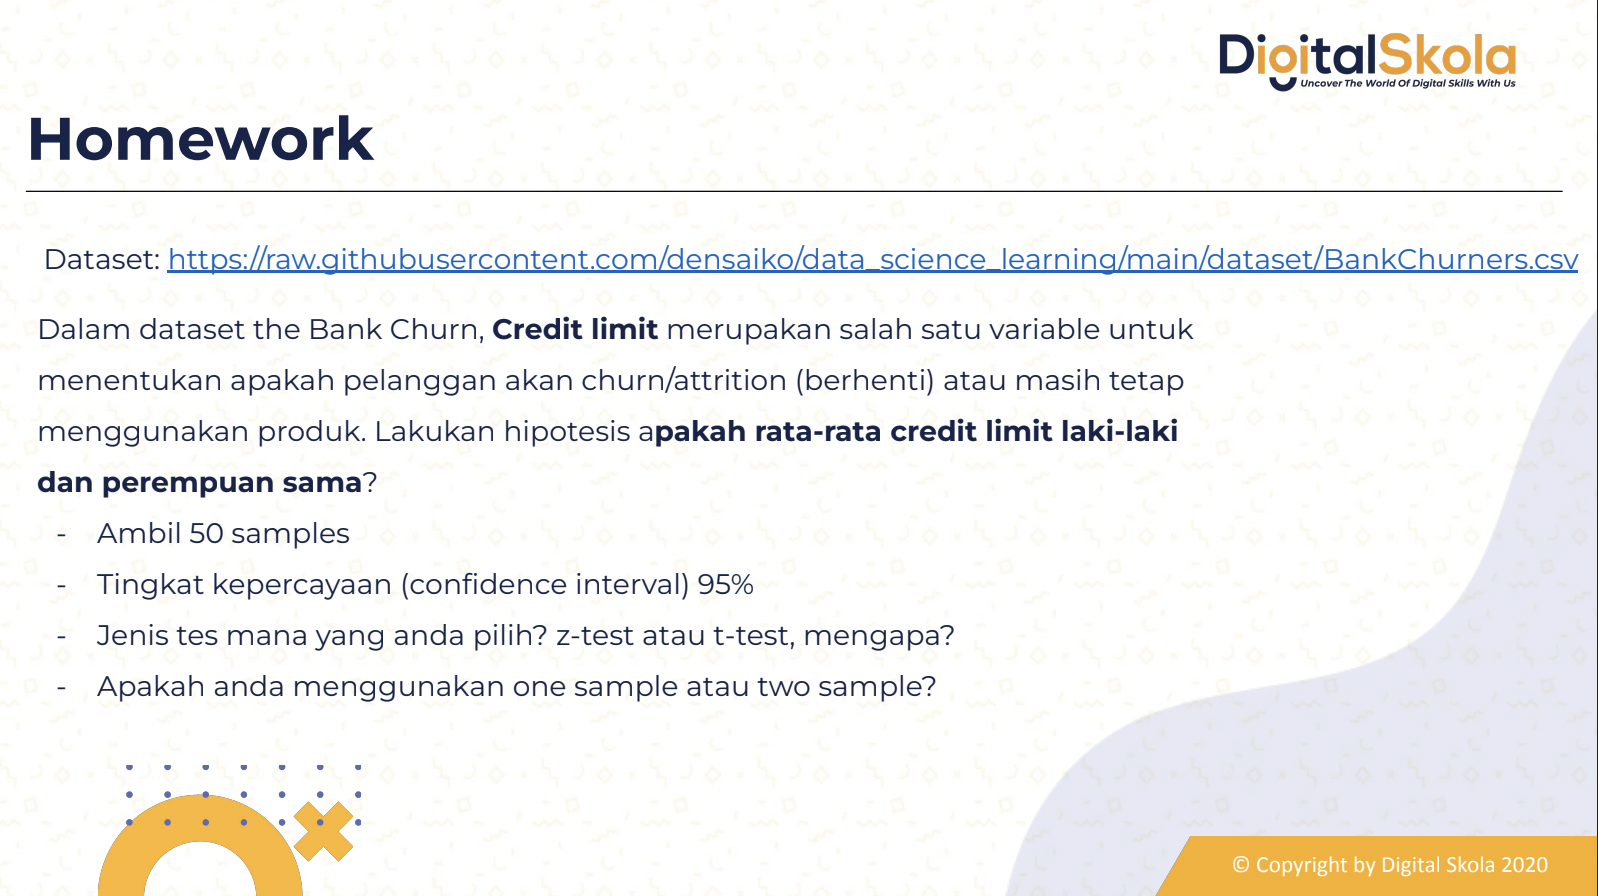

- Install and Import Library
- Read Data
- Sampling Data
- Hypothesis Testing

#Install and Import Library


In [ ]:
!pip install scipy

In [ ]:
!pip install --upgrade scipy

     |████████████████████████████████| 38.1 MB 1.1 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
!pip install statsmodels

In [ ]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.stats.weightstats import ztest
from scipy.stats import stats, chi2_contingency
from statsmodels.stats.proportion import proportions_ztest

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Read Data

In [ ]:
#Read & open Dataset
data = pd.read_csv("https://raw.githubusercontent.com/densaiko/data_science_learning/main/dataset/BankChurners.csv")
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


#Data Sampling

Female customer

In [ ]:
female = data[data['Gender'] == 'F']
female.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
14,712396908,Existing Customer,57,F,2,Graduate,Married,Less than $40K,Blue,48,5,2,2,2436.0,680,1756.0,1.190,1570,29,0.611,0.279,0.000114,0.999890
19,709327383,Existing Customer,45,F,2,Graduate,Married,Unknown,Blue,37,6,1,2,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080,0.000055,0.999940
21,708508758,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,2,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000,0.996160,0.003836


Male Customer

In [ ]:
male = data[data['Gender'] == 'M']
male.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988


Statified Sampling

In [ ]:
data.groupby(['Gender'], as_index=True).apply(lambda x: x.sample(n=50, random_state=50))

CLIENTNUM  ... Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
Gender                   ...                                                                                                                                   
F      9116   823539558  ...                                           0.999820                                                                                
       8790   716098683  ...                                           0.999890                                                                                
       7289   809127858  ...                                           0.999900                                                                                
       6112   712446783  ...                                           0.001844                                                                                
       471    710665533  ...                                           0.999830                                                                                
...                 ...  ...                                                ...                                                                                
M      10103  717185658  ...                                           0.002118                                                                                
       7061   771408483  ...                                           0.999940                                                                                
       4787   794967408  ...                                           0.999920                                                                                
       567    789115833  ...                                           0.999820                                                                                
       8390   809631483  ...                                           0.999890                                                                                

[100 rows x 23 columns]

#Hypothesis Testing

**Ztest-two sample**
 
Ztest-two sample is used because the number of sample more than 30 and to check is the credit limit of male and female customer the same?

H0 : Credit Limit Average Male == Female

H1 : Credit Limit Average Male != Female

In [ ]:
#populasi
pop_std = data['Credit_Limit'].std()
pop_avg = data['Credit_Limit'].mean()

print("Population - STD:",round(pop_std))
print("Population - mean:",round(pop_avg))

Population - STD: 9089
Population - mean: 8632


In [ ]:
# set the value
confidence_level = 0.95
alpha = 1-confidence_level

# Credit Limit - Male
male = data[data['Gender']=="M"]
p_credit_male = male['Credit_Limit'].mean()
s_credit_male = male['Credit_Limit'].sample(50)

# Credit Limit - Female
female = data[data['Gender']=="F"]
p_credit_female = female['Credit_Limit'].mean()
s_credit_female = female['Credit_Limit'].sample(50)

# Difference between population 
difference = p_credit_male-p_credit_female


# Ztest hypothesis
ztest_Score, pvalue = ztest(x1=s_credit_male, x2=s_credit_female, value=0) 

# test
if alpha > pvalue:
  print("Reject the hypothesis")
  print("Because the pvalue {:.2f} < {:.2f}".format(pvalue, alpha))
else:
  print("Accept the hypothesis")
  print("Because the pvalue {:.2f} > {:.2f}".format(pvalue, alpha))

Reject the hypothesis
Because the pvalue 0.00 < 0.05


**Conclusion**

reject means H0 is not accepted. Thus the credit limit average between male and female customer is not the same